In [2]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

## Plot Origin FSD

In [3]:
def draw_flow_size_distribution(fileNames):
    
    fs = []
    prob = []
    cdfs = []
    labels = []
    
    for fileName in fileNames: 
        print(fileName)
        flow_size = []
        frequency = []
        total_packets = 0
    
        with open(fileName, "r") as file:
            for line in file:
                items = line.strip().split(" ")
                flow_size.append(int(items[0]))
                frequency.append(int(items[1]))
                total_packets += int(items[0])*int(items[1])
            
            
        # Calculate mean and variance
        flow_sizes_array = np.array(flow_size)
        frequencies_array = np.array(frequency)

        mean_flow_size = np.average(flow_sizes_array, weights=frequencies_array)
        variance_flow_size = np.average((flow_sizes_array - mean_flow_size)**2, weights=frequencies_array)
    
        # print("Mean Flow Size:", mean_flow_size)
        # print("Variance of Flow Size:", variance_flow_size)
        
        # Plot PDF & CDF
        total_flows = sum(frequency)
        probabilities = [freq / total_flows for freq in frequency]
        # print(flow_size)
        print("Total Flows: ", total_flows)
        print("Total Packets: ", total_packets)
        print("Density: ", int(total_packets/total_flows))
        # print(probabilities)
        
        cdf = np.cumsum(probabilities)
        
        fs.append(flow_size)
        prob.append(probabilities)
        cdfs.append(cdf)
        labels.append(fileName.split("/")[-1][:-4])
    
    plt.figure(figsize=(10, 5))
    # Plot PDF
    plt.subplot(1, 2, 1)
    
    for i in range(len(fs)):
        plt.plot(fs[i], prob[i], linestyle='-', label = labels[i])
    
    # plt.bar(flow_size, probabilities, width=1.0, color='blue', alpha=0.7)
    plt.title('Probability Density Function (PDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Probability')
    plt.legend(loc="upper right")
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,10000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set specific tick positions
    plt.grid(True)
    
    # Plot CDF
    plt.subplot(1, 2, 2)
    for i in range(len(fs)):
        plt.plot(fs[i], cdfs[i], linestyle='-', label = labels[i])
    plt.title('Cumulative Distribution Function (CDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Cumulative Probability')
    plt.legend(loc="lower right")
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,100000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set specific tick positions

    plt.grid(True)
    
    
    plt.tight_layout()
    plt.show()
    
# draw_flow_size_distribution("/home/ming/SketchMercator/traffic_sampler/fs_dist/fs_dist.txt")

/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/caida0517-030w.txt
Total Flows:  7696
Total Packets:  337001
Density:  43
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/caida0517-070w.txt
Total Flows:  15393
Total Packets:  687780
Density:  44
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/caida0517-150w.txt
Total Flows:  35918
Total Packets:  1623450
Density:  45
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/caida0517-250w.txt
Total Flows:  53878
Total Packets:  2441598
Density:  45
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/caida0517-500w.txt
Total Flows:  107755
Total Packets:  5061345
Density:  46
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/zipf10-030w.txt
Total Flows:  1309
Total Packets:  375245
Density:  286
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/zipf10-070w.txt
Total Flows:  26

/tmp/ipykernel_31894/3322723123.py:62: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,10000])
/tmp/ipykernel_31894/3322723123.py:76: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,100000])


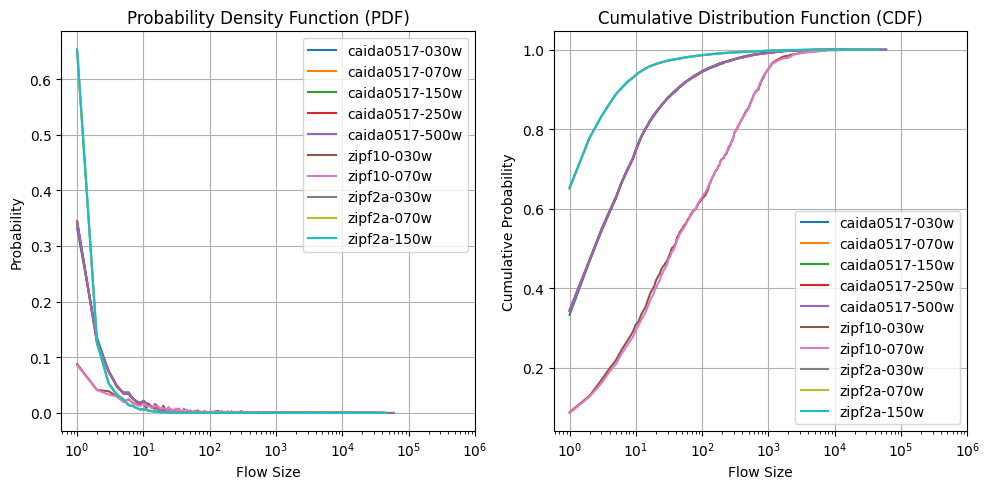

IndexError: list index out of range

In [4]:
pcap_folder = "/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/"
pcap_file = []
for file_name in sorted(os.listdir(pcap_folder)):
    if file_name.split("-")[0] == "zipf18":
        continue
    file_path = pcap_folder + file_name
    pcap_file.append(file_path)
    
# for file in pcap_file:
#     draw_flow_size_distribution(file)
#     break

draw_flow_size_distribution(pcap_file)
draw_flow_size_distribution([pcap_file[1], pcap_file[6], pcap_file[10], ])
# draw_flow_size_distribution(pcap_file[:3])
# draw_flow_size_distribution(pcap_file[3:6])
# draw_flow_size_distribution(pcap_file[6:9])
# draw_flow_size_distribution(pcap_file[9:12])
# draw_flow_size_distribution(pcap_file[12:15])


/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist/caida0517-125w.txt
Total Flows:  26938
Total Packets:  1254001
Density:  46
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist/caida0517-250w.txt
Total Flows:  53878
Total Packets:  2441598
Density:  45
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist/caida0517-500w.txt
Total Flows:  107755
Total Packets:  5061345
Density:  46
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist/caida0816-150w.txt
Total Flows:  28343
Total Packets:  1519854
Density:  53
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist/caida0816-300w.txt
Total Flows:  56686
Total Packets:  2933291
Density:  51
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist/caida0816-600w.txt
Total Flows:  113373
Total Packets:  5857213
Density:  51
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist/zipf2a-150w.txt
Total Flows:  77378
Total Packets:  

/tmp/ipykernel_5639/3322723123.py:62: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,10000])
/tmp/ipykernel_5639/3322723123.py:76: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,100000])


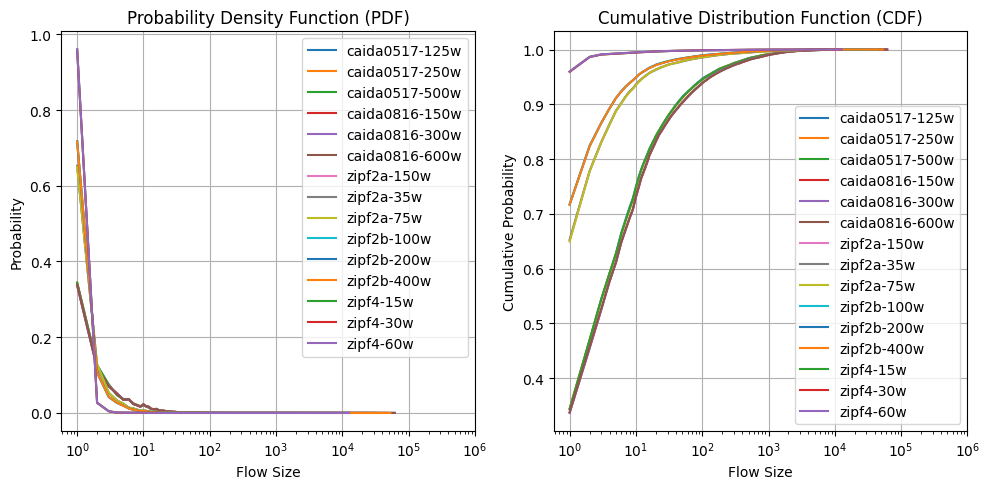

/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist/caida0517-125w.txt
Total Flows:  26938
Total Packets:  1254001
Density:  46
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist/caida0816-150w.txt
Total Flows:  28343
Total Packets:  1519854
Density:  53
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist/zipf2a-150w.txt
Total Flows:  77378
Total Packets:  1386301
Density:  17
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist/zipf2b-100w.txt
Total Flows:  71827
Total Packets:  1109631
Density:  15
/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist/zipf4-15w.txt
Total Flows:  66492
Total Packets:  148123
Density:  2


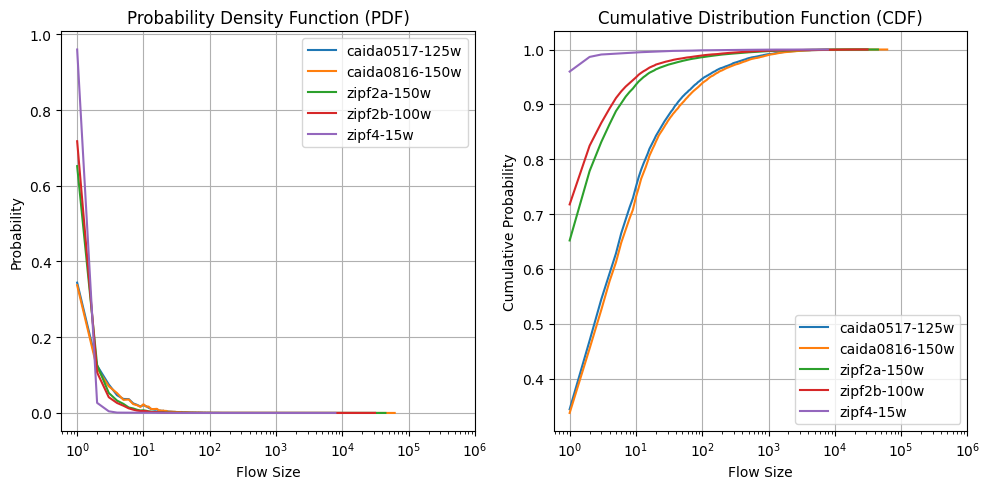

In [4]:
pcap_folder = "/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist/"
pcap_file = []
for file_name in sorted(os.listdir(pcap_folder)):
    file_path = pcap_folder + file_name
    pcap_file.append(file_path)
    
# for file in pcap_file:
#     draw_flow_size_distribution(file)
#     break

draw_flow_size_distribution(pcap_file)
draw_flow_size_distribution(pcap_file[::3])
# draw_flow_size_distribution(pcap_file[:3])
# draw_flow_size_distribution(pcap_file[3:6])
# draw_flow_size_distribution(pcap_file[6:9])
# draw_flow_size_distribution(pcap_file[9:12])
# draw_flow_size_distribution(pcap_file[12:15])
